# Histograms and Density Plots in Python


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [2]:
# Read in data and examine first 10 rows
flights = pd.read_csv('data/formatted_flights.csv')

#drop the unnecessary first column
flights = flights.drop(flights.columns[0], axis=1)
flights.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


# Exploring the Data

Text(0, 0.5, 'Flights')

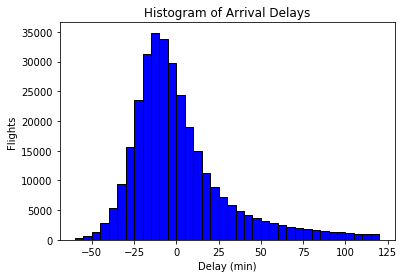

In [3]:
# matplotlib histogram
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

### Testing 4 Different Binwidths

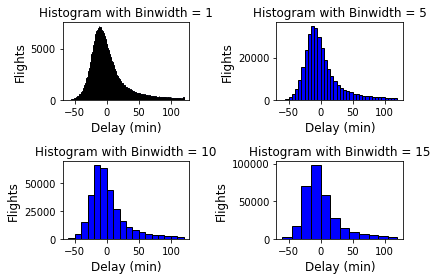

In [4]:
# Show 4 different binwidths
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 12)
    ax.set_xlabel('Delay (min)', size = 12)
    ax.set_ylabel('Flights', size= 12)

plt.tight_layout()
plt.show()

C:\Users\sk8er\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


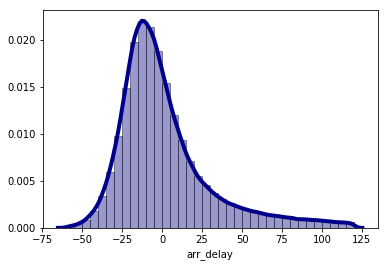

In [5]:
# Density Plot and Histogram of all arrival delays
sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': (4)})

# visualizing the arrival delays of multiple airlines

Text(0, 0.5, 'Density')

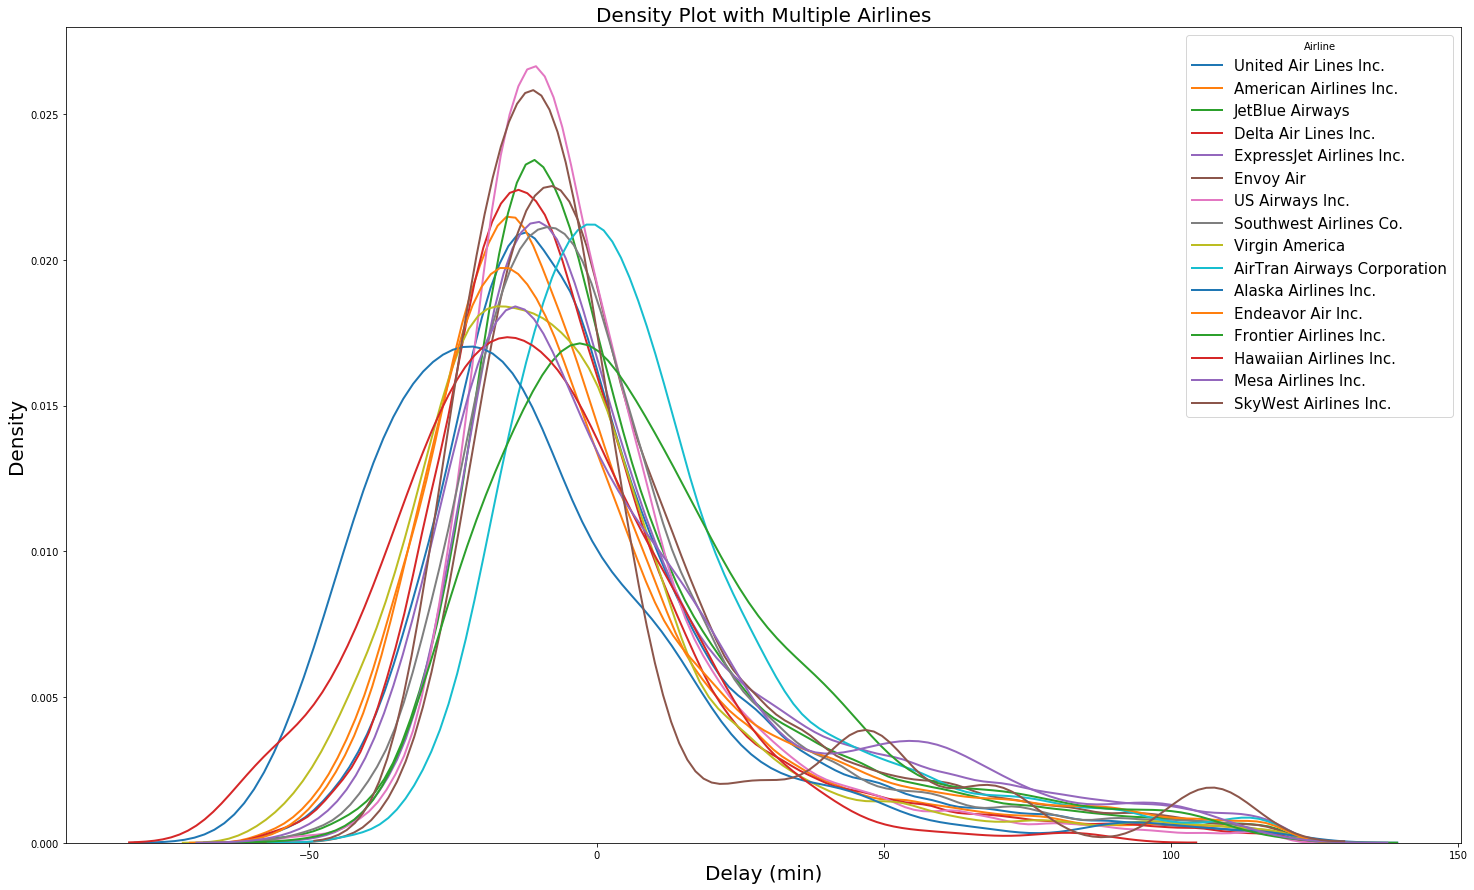

In [6]:
#Set the figure size
ax, fig = plt.subplots(figsize=(25,15))
# Iterate through the five airlines
for airline in flights.name.unique():
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = airline)

# Plot formatting
plt.legend(prop={'size': 15}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines', fontsize=20)
plt.xlabel('Delay (min)', fontsize=20)
plt.ylabel('Density', fontsize=20)


Looking at this graph we can see Alaska Airlines Inc. looks like it has the shortest mean arrival delay. 
This is a useful graph but due to the number of airlines its difficult to clearly see which 5 airlines have the shortest arrival delays in the dataset.  

In [7]:
groupby_airline_name = flights.groupby(['name'])

groupby_airline_name_df = groupby_airline_name['arr_delay'].describe().reset_index()
groupby_airline_name_df.sort_values('mean', ascending=1, inplace=True)

groupby_airline_name_df

,name,count,mean,std,min,25%,50%,75%,max
1,Alaska Airlines Inc.,689.0,-11.878084,29.566533,-60.0,-31.0,-18.0,1.0,119.0
8,Hawaiian Airlines Inc.,332.0,-11.608434,23.604822,-60.0,-27.0,-13.0,2.0,83.0
15,Virgin America,4920.0,-5.178252,28.641181,-60.0,-23.0,-10.0,5.0,120.0
2,American Airlines Inc.,31197.0,-3.985960,28.257029,-60.0,-22.0,-10.0,6.0,120.0
3,Delta Air Lines Inc.,46468.0,-3.246191,26.723283,-60.0,-20.0,-9.0,6.0,120.0
14,United Air Lines Inc.,56359.0,-0.805461,28.096723,-60.0,-19.0,-7.0,10.0,120.0
13,US Airways Inc.,19547.0,-0.471070,23.943063,-60.0,-15.0,-6.0,7.0,120.0
4,Endeavor Air Inc.,16578.0,-0.261913,31.999876,-60.0,-21.0,-9.0,11.0,120.0
11,SkyWest Airlines Inc.,27.0,1.814815,31.552200,-26.0,-16.0,-8.0,3.0,107.0
12,Southwest Airlines Co.,11588.0,2.522351,28.084498,-58.0,-15.0,-4.0,12.0,120.0


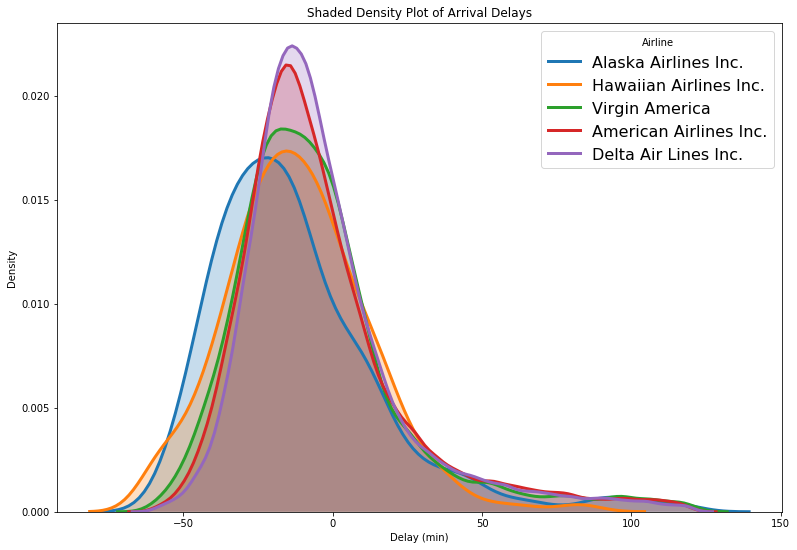

In [13]:
%matplotlib inline
top_by_mean = groupby_airline_name_df.loc[ groupby_airline_name_df['mean'] < 0 ]
ax, fig = plt.subplots(figsize=(13,9))

for airline in top_by_mean[:5]['name']:
    subset = flights[flights['name'] == airline]
    
    sns.distplot(subset['arr_delay'], hist=False, kde=True, rug=False,
                 kde_kws = {'shade': True, 'linewidth': (3)},
                 rug_kws={'color': 'black'},
                 label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Shaded Density Plot of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

Alaska Airlines and Hawaiian Airlines have the shortest arrival delays in the dataset. 

# The four aspects of the Centeral Limit Thereom 

The four aspects of the Centeral Limit Theorem

1. The sampling dist of the mean will be less spread than the values in the population from which the sample is drawn

1. The sampling dist will be well-modeled by a normal dist.

1. The spread of the sampling dist. is related to the spread of the population values $\mu_{sampling} = \mu_{population}$, $\sigma_{sampling} = \frac{\sigma_{population}}{ \sqrt{n}}$

1. Bigger samples lead to a smaller spread in the sampling dist

In [9]:
#create sample helper function 
#params: df: dataframe object, n: number of samples of size m, m: size of individual sample
#returns: a list of dataframe or series objects containing samples of size m  
def sample(df, n:int, m:int):
    samples = []
    for i in range(n):
        samples.append(df.sample(m))
    return samples

#number of samples
n = 550
#size of each sample 
m = 180

#call the sample helper function
samples = sample(flights,n,m)

#find the mean and standard deviation for each sample and put them in a python list
means = [np.mean(x.arr_delay) for x in samples]
stdivs = [np.std(x.arr_delay) for x in samples]


Text(0.5, 0, 'Delay (min)')

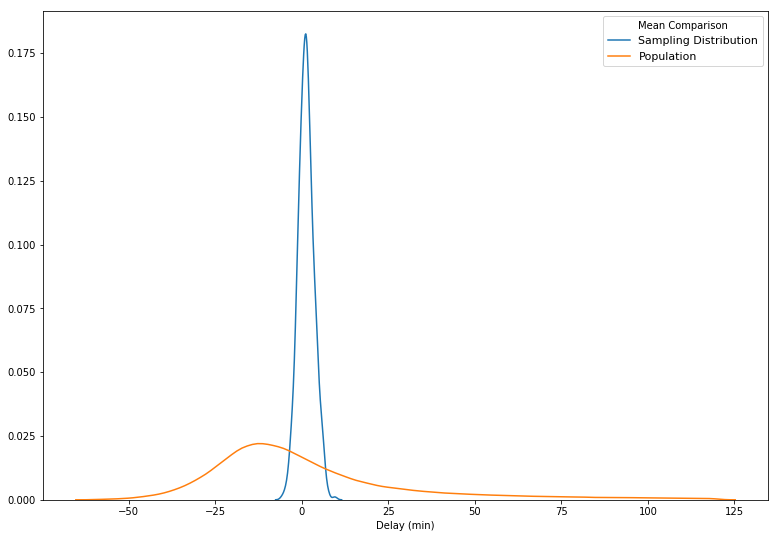

In [10]:
# 1.The sampling distribution of the mean is less spread than the values in the population from which the samples are drawn.
ax, fig = plt.subplots(figsize=(13,9))
sns.distplot(means, kde=True,hist=False, label='Sampling Distribution')
sns.distplot(flights.arr_delay, kde=True, hist=False, label='Population')

# Plot formatting
plt.legend(prop={'size': 11}, title = 'Mean Comparison')
plt.xlabel('Delay (min)')

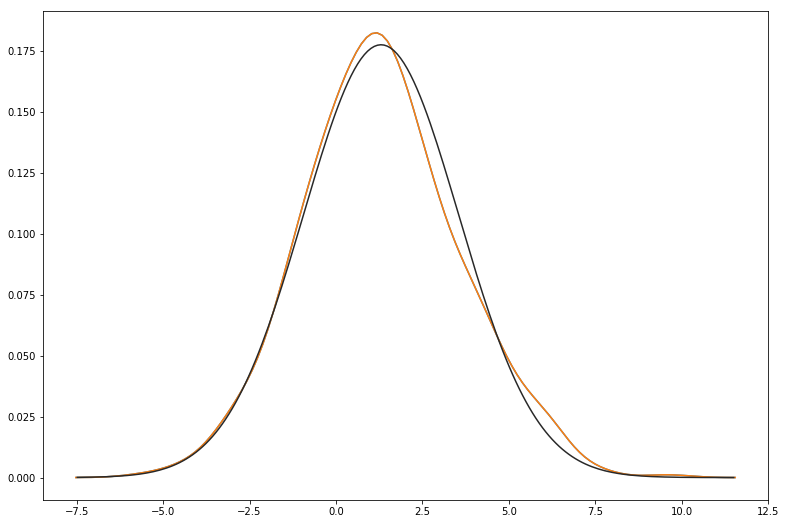

In [11]:
# 2. The sampling distribution is well-modeled by a normal distribution
ax, fig = plt.subplots(figsize=(13,9))
sns.distplot(means,kde=True,hist=False)
sns.distplot(means,hist=False,fit=norm)

In [12]:
# 3. The spread of the sampling distribution is related to the spread of the population values
# 4. Bigger samples lead to smaller spread in the sampling distribution 
# (mean = μ, standard deviation = σ/sqrt(n))
print("Sample Mean = {:.2f}, Population Mean = {:.2f}".format(np.mean(means), np.mean(flights.arr_delay)))
print("Sample Standard Deviation = {:.2f}, Population Standard Deviation = {:.2f}".format(np.mean(stdivs),np.std(flights.arr_delay)))
print("sqrt(m) = {:.2f}, Population Standard Deviation/Sample Standard Deviation = {:.2f}".format(np.sqrt(m),(np.std(flights.arr_delay)/np.std(means))))
print("A larger sample size will improve the accuracy of our result. ")

Sample Mean = 1.30, Population Mean = 1.30
Sample Standard Deviation = 28.83, Population Standard Deviation = 29.06
sqrt(m) = 13.42, Population Standard Deviation/Sample Standard Deviation = 12.94
A larger sample size will improve the accuracy of our result. 
